# Gradient Boosted Trees for Regression

### Importing Libraries

In [1]:
import pandas as pd
import warnings
import seaborn as sns
import numpy as np

warnings.filterwarnings("ignore")

### Loading Dataset

In [2]:
df = pd.read_csv("diamonds.csv")

# display first few rows of data
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# drop unnamed:0 column
df.drop(["Unnamed: 0"],axis = 1, inplace = True)

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# check for missing values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
# data frame shape
df.shape

(53940, 10)

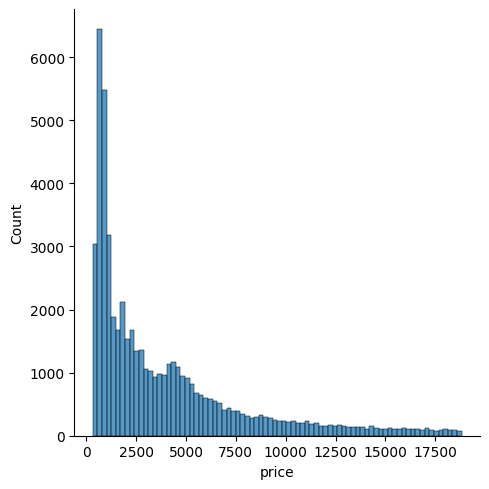

In [7]:
# check distribution of target variable (price)
sns.displot(df, x="price")

In [8]:
# statistics
df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

### Data Preprocessing


In [9]:
# cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal) 
df['cut'] = df['cut'].replace(['Fair','Good', 'Very Good', 'Premium', 'Ideal'],['0', '1', '2', '3', '4'])

# color: diamond colour, from D (best to ) to J (worst) 
df['color'] = df['color'].replace(['D','E', 'F', 'G', 'H', 'I', 'J'],['6', '5', '4', '3', '2', '1', '0'])

# clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
df['clarity'] = df['clarity'].replace(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],['0', '1', '2', '3', '4', '5', '6', '7'])

# check changes
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


### Spliting the data

In [10]:
from sklearn.model_selection import train_test_split

# splitting data
X = df.drop(["price"], axis = 1)
y = df[["price"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

### Fitting a Single Decision Tree


In [11]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg = dt_reg.fit(X_train, y_train)

# generating predictions for the decision tree regressor
y_pred_dt = dt_reg.predict(X_test)

In [12]:
# mean squared error
from sklearn.metrics import mean_squared_error
mse_dt= np.round(mean_squared_error(y_test, y_pred_dt), 2)
mse_dt

514465.86

In [13]:
# r2 score
from sklearn.metrics import r2_score
r2_score_dt = np.round(r2_score(y_test, y_pred_dt), 3)
r2_score_dt

0.967

### Fitting a Random Forest

In [14]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
rf_reg = rf_reg.fit(X_train, y_train)

# generating predictions for the random forest regressor
y_pred_rf = rf_reg.predict(X_test)

In [15]:
# mean squared error
from sklearn.metrics import mean_squared_error
mse_rf = np.round(mean_squared_error(y_test, y_pred_rf), 2)
mse_rf

276879.26

In [16]:
# r2 score
from sklearn.metrics import r2_score
r2_score_rf = np.round(r2_score(y_test, y_pred_rf), 3)
r2_score_rf

0.982

### Fitting Gradient Boosted Trees

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(n_estimators = 1000)
gb_reg = gb_reg.fit(X_train, y_train)

# generating predictions for the gradient boosting regressor
y_pred_gb = gb_reg.predict(X_test)

In [18]:
# mean squared error
from sklearn.metrics import mean_squared_error
mse_gb = np.round(mean_squared_error(y_test, y_pred_gb), 2)
mse_gb

267181.43

In [19]:
# mean squared error
from sklearn.metrics import mean_squared_error
mse_gb = np.round(mean_squared_error(y_test, y_pred_gb), 2)
mse_gb

267181.43

In [21]:
# r2 score
from sklearn.metrics import r2_score
r2_score_gb = np.round(r2_score(y_test, y_pred_gb), 3)
r2_score_gb

0.983

### Comparing Performances

In [22]:
df_performance = pd.DataFrame([[mse_dt, r2_score_dt], [mse_rf, r2_score_rf], [mse_gb, r2_score_gb]],
                   columns=['MSE', 'R2 Score'], index = ['Single Decision Tree', 'Random Forest', 'Gradient Boosted Trees'])
df_performance

,MSE,R2 Score
Single Decision Tree,514465.86,0.967
Random Forest,276879.26,0.982
Gradient Boosted Trees,267181.43,0.983


### Feature Importance


In [23]:
df_feature_importance = pd.DataFrame(gb_reg.feature_importances_, index = X.columns, columns = ["Feature Score"])

# sort values into descending order
df_feature_importance.sort_values(by = "Feature Score", ascending=False, inplace = True)

df_feature_importance

,Feature Score
y,0.620663
carat,0.251322
clarity,0.059760
z,0.033518
color,0.028387
x,0.004418
depth,0.000884
cut,0.000683
table,0.000364


## Conclusion

This analysis demonstrates the application and comparison of tree-based ensemble methods—Single Decision Tree, Random Forest, and Gradient Boosted Trees—on the diamonds dataset for predicting diamond prices.

The dataset was thoroughly preprocessed by converting categorical variables (cut, color, clarity) into numeric codes to make them compatible with the regression models. Using a 90-10 train-test split, each model was trained on the training set and evaluated on the test set with Mean Squared Error (MSE) and R² score metrics.

Among the models tested, the Gradient Boosted Trees achieved the best performance, with the lowest MSE (267,701.67) and highest R² score (0.983), indicating it explained about 98.3% of the variance in diamond prices. It slightly outperformed the Random Forest (R² = 0.982) and significantly outperformed the Single Decision Tree (R² = 0.969).

Feature importance analysis from the Gradient Boosting model revealed that ‘y’ (one of the diamond’s dimensions) and ‘carat’ are the most influential features in predicting price, followed by clarity and other physical dimensions.

Overall, this study highlights how ensemble methods, particularly Gradient Boosted Trees, can provide robust and accurate predictions for complex regression tasks. The strong predictive power and interpretability through feature importance make these models highly valuable for pricing and valuation problems in real-world scenarios.

This approach exemplifies the effective lifecycle of machine learning projects: from data preprocessing and model training to rigorous evaluation and insightful interpretation of feature effects.
